/Users/shhong/Documents/Ines/pybrep


In [10]:
import pybrep.cell_population as cell_pop

In [17]:
import numpy as np


In [19]:
xyz = np.random.rand(10,3)
xyz[:,0] = xyz[:,0]*1500
xyz[:,1] = xyz[:,1]*750
xyz[:,2] = xyz[:,2]*200


In [12]:
import matplotlib.pyplot as plt
%matplotlib ipympl

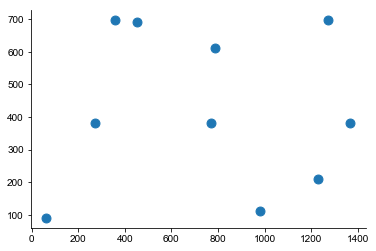

In [20]:
plt.scatter(xyz[:,0], xyz[:,1], 80)

In [22]:
mlis = cell_pop.MLI_pop([])
mlis.load_somata(xyz)

In [24]:
mlis.add_dendrites()

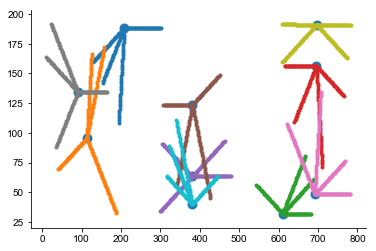

In [28]:
idx = mlis.qpts.idx
for i in np.unique(idx):
    ii = (i==idx)
    xyz1 = mlis.qpts.coo[ii,:]
    plt.plot(xyz1[:,1], xyz1[:,2], '.')
plt.scatter(xyz[:,1], xyz[:,2], 80)

In [1]:
cd ..

/Users/shhong/Documents/Ines/pybrep


In [2]:
import pybrep as brp
import numpy as np
from neuron import h


In [3]:
h.xopen("/Users/shhong/Dropbox/network_data/model/params/set3005/Parameters.hoc")
gp = brp.create_population('Granule', h)


Nseg for APical is 5 and Basal is 3
	36 


In [4]:
gp.load_somata('/Users/shhong/Dropbox/network_data/input_brep_2/GCcoordinates.dat')
gp.add_aa_endpoints_fixed()
gp.add_pf_endpoints()


Successfully read /Users/shhong/Dropbox/network_data/input_brep_2/GCcoordinates.dat.


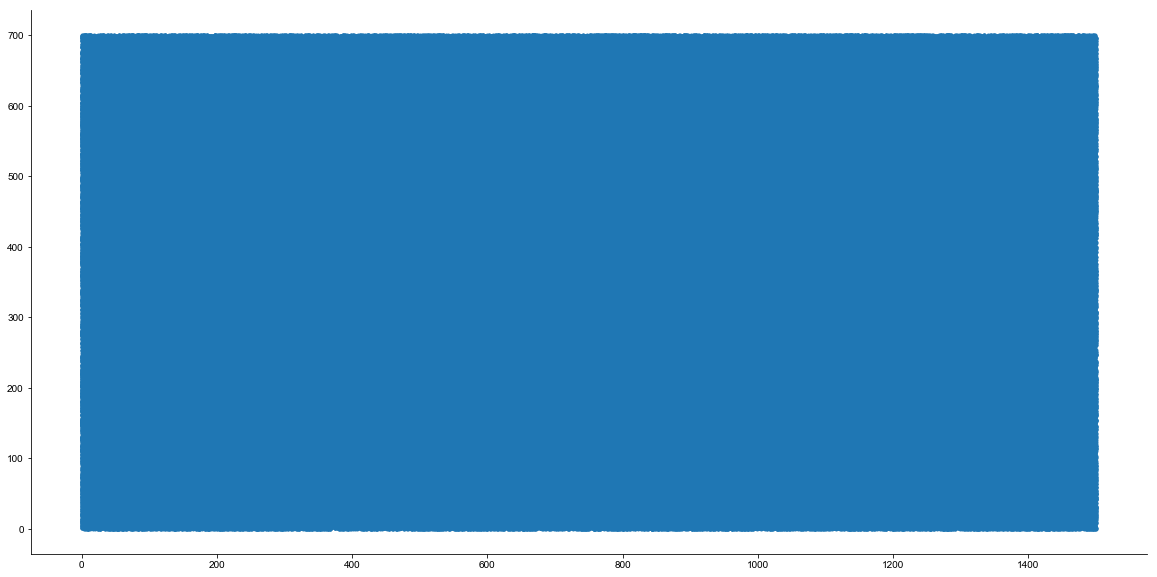

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

_, ax = plt.subplots(figsize=(20,10))
ax.plot(gp.som[:,0], gp.som[:,1], '.')

In [9]:
n_mli = 21735 # rat
n_mli = 22275 # human
n_mli = 33413
n_mli = int(33413/10) # test only with 10%

In [10]:
xyz = np.random.rand(n_mli, 3)
xyz[:,0] = xyz[:,0]*1500
xyz[:,1] = xyz[:,1]*750
xyz[:,2] = xyz[:,2]*200


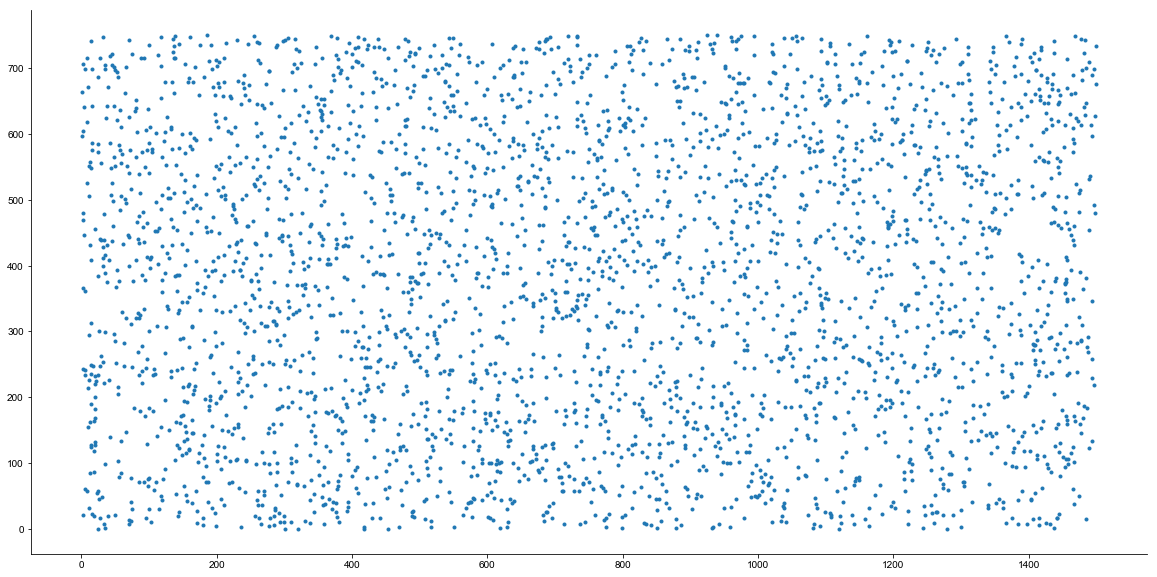

In [11]:
_, ax = plt.subplots(figsize=(20,10))
ax.plot(xyz[:,0], xyz[:,1], '.')

In [12]:
mlip = brp.create_population('MLI', h)


In [13]:
mlip.load_somata(xyz)

In [14]:
mlip.add_dendrites()
mlip.qpts.coo[:,2] = mlip.qpts.coo[:,2] + h.GLdepth + h.PCLdepth

100%|██████████| 3341/3341 [07:28<00:00,  3.71it/s]


In [22]:
mlip.qpts.idx

array([   0.,    0.,    0., ..., 3340., 3340., 3340.])

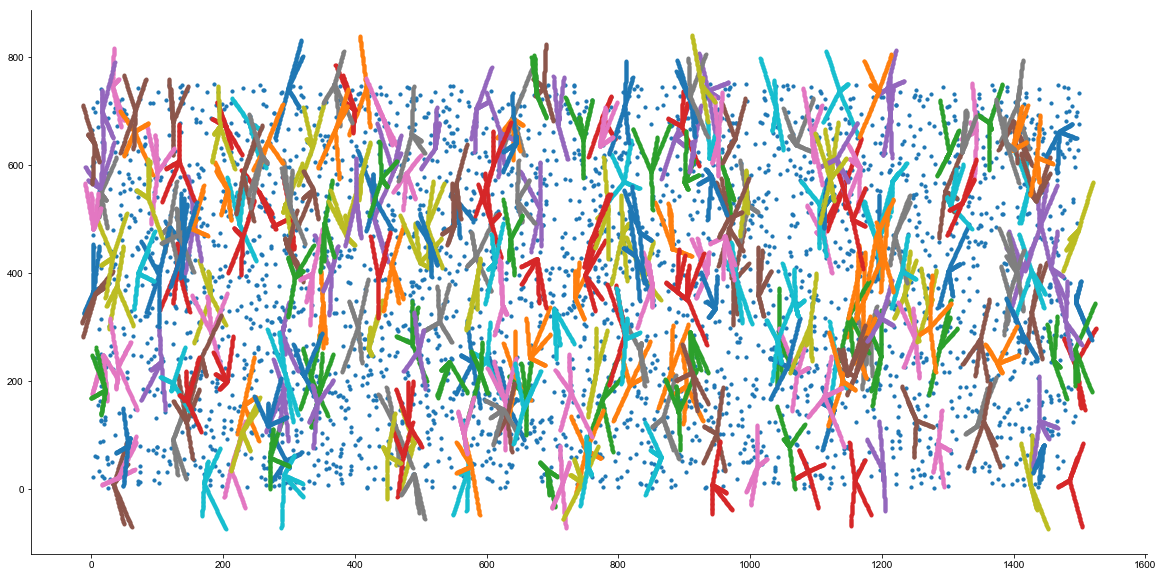

In [30]:
_, ax = plt.subplots(figsize=(20,10))
idx = mlip.qpts.idx
for i in range(300):
    ii = (i==idx)
    xyz1 = mlip.qpts.coo[ii,:]
    ax.plot(xyz1[:,0], xyz1[:,1], '.')
ax.scatter(xyz[:,0], xyz[:,1], 10)

In [51]:
c_rad_aa = h.AAtoGoCzone/1.73

In [52]:
cc = brp.Connect_2D(gp.qpts_aa, mlip.qpts, c_rad_aa)

In [53]:
cc.connections_parallel(deparallelize=True, nblocks=120, debug=True)

Blocks =  120




  0%|          | 0/120 [00:00<?, ?it/s]

  1%|          | 1/120 [00:19<39:13, 19.78s/it]

  2%|▏         | 2/120 [00:40<39:32, 20.10s/it]

  2%|▎         | 3/120 [01:01<39:40, 20.34s/it]

KeyboardInterrupt: 

In [54]:
c_rad_pf = h.PFtoGoCzone/1.113
cc = brp.Connect_2D(gp.qpts_pf, mlip.qpts, c_rad_pf)
cc.connections_parallel(deparallelize=True, nblocks=120, debug=True)

Blocks =  120





  0%|          | 0/120 [00:00<?, ?it/s]


  1%|          | 1/120 [00:20<40:32, 20.44s/it]


  2%|▏         | 2/120 [00:42<40:59, 20.84s/it]


  2%|▎         | 3/120 [01:03<41:02, 21.05s/it]


  3%|▎         | 4/120 [01:24<40:34, 20.99s/it]


  4%|▍         | 5/120 [01:45<40:08, 20.94s/it]


  5%|▌         | 6/120 [02:06<39:46, 20.93s/it]


  6%|▌         | 7/120 [02:27<39:22, 20.91s/it]


  7%|▋         | 8/120 [02:48<39:30, 21.16s/it]


  8%|▊         | 9/120 [03:10<39:20, 21.26s/it]


  8%|▊         | 10/120 [03:30<38:15, 20.86s/it]


  9%|▉         | 11/120 [03:50<37:25, 20.60s/it]


 10%|█         | 12/120 [04:10<36:58, 20.54s/it]


 11%|█         | 13/120 [04:31<36:36, 20.53s/it]


 12%|█▏        | 14/120 [04:50<35:36, 20.15s/it]


 12%|█▎        | 15/120 [05:10<35:09, 20.09s/it]


 13%|█▎        | 16/120 [05:32<35:38, 20.56s/it]


 14%|█▍        | 17/120 [05:54<36:07, 21.04s/it]


 15%|█▌        | 18/120 [06:15<35:40, 20.98s/it]


 16%|█▌        | 19/120 [06:36<35:21, 21.01s/i

In [48]:
gp.qpts_pf.coo[2][:,2][0]

351.0

In [55]:
cc.save_result('PFtoMLI')

/Users/shhong/Documents/Ines/pybrep/pybrep/connector.py:265: UserWarning: Pre-existing table connection will be destroyed.
  warnings.warn('Pre-existing table ' + table_name + ' will be destroyed.')


Begin writing the results.


KeyboardInterrupt: 

In [50]:
mlip.qpts.coo

array([[   2.9659673 ,  366.31367359,  373.81661941],
       [   3.17498493,  368.30272151,  373.81661941],
       [   3.38400257,  370.29176943,  373.81661941],
       ...,
       [1369.57069461,  248.62121872,  326.80561901],
       [1369.77971224,  249.61404072,  325.08207147],
       [1369.98872987,  250.60686272,  323.35852394]])

In [63]:
cc.result.shape[0]/10**6

165.916999

In [66]:
tgt = cc.result['target'].values

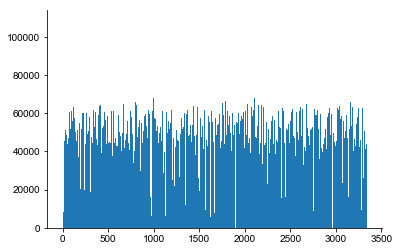

In [70]:
z = plt.hist(tgt, range(3341))

In [73]:
z[0].mean()

49675.74820359281

In [74]:
from tqdm import tqdm

In [76]:
for i, x in tqdm(enumerate(['a', 'b', 'c'])):
    print(i, x)




0it [00:00, ?it/s]


3it [00:00, 2462.89it/s]

0 a
1 b
2 c
